In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-housing/USA_Housing.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [10]:
USAhousing = pd.read_csv('/kaggle/input/usa-housing/USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

**EDA**

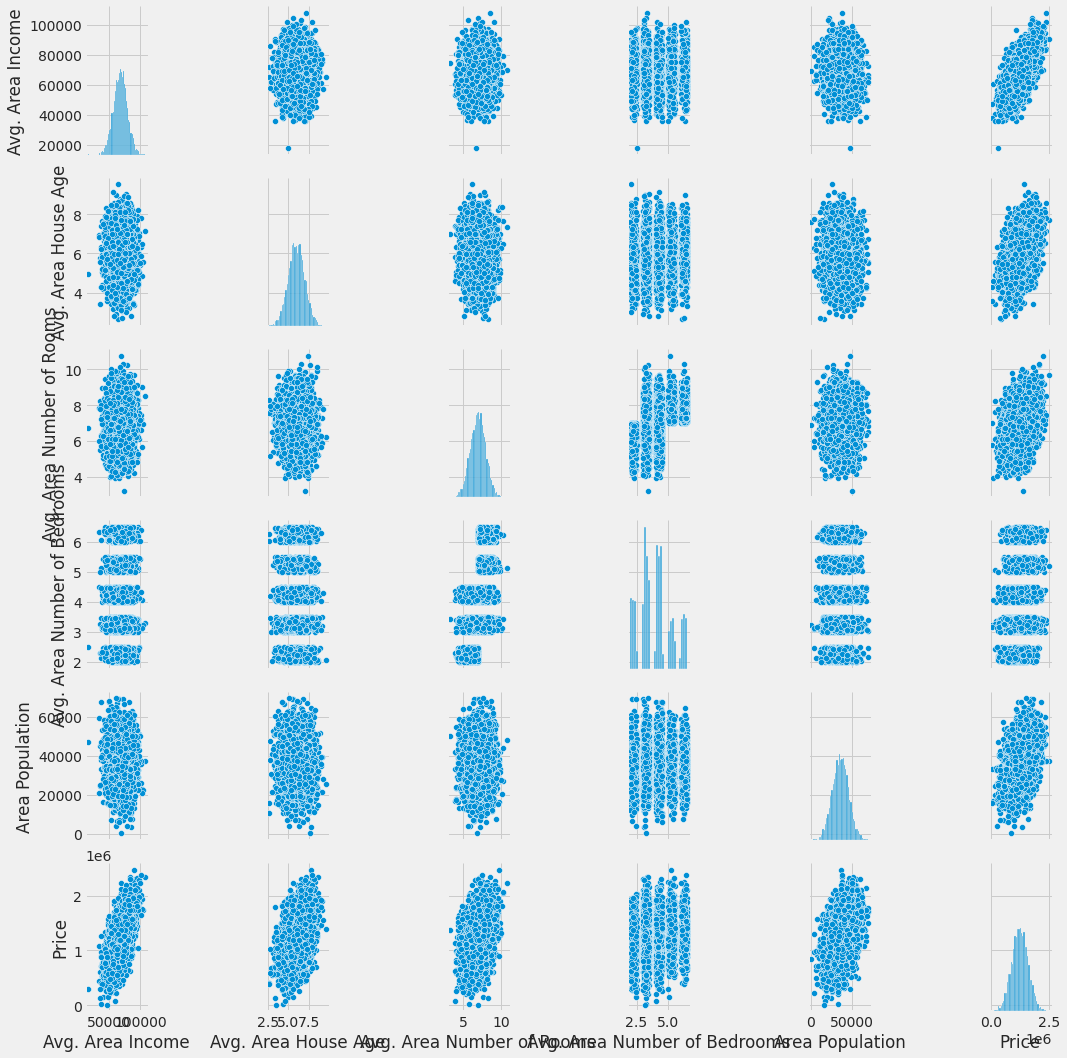

In [14]:
sns.pairplot(USAhousing)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

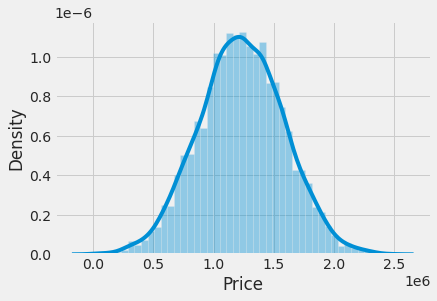

In [16]:
sns.distplot(USAhousing['Price'])

<AxesSubplot:>

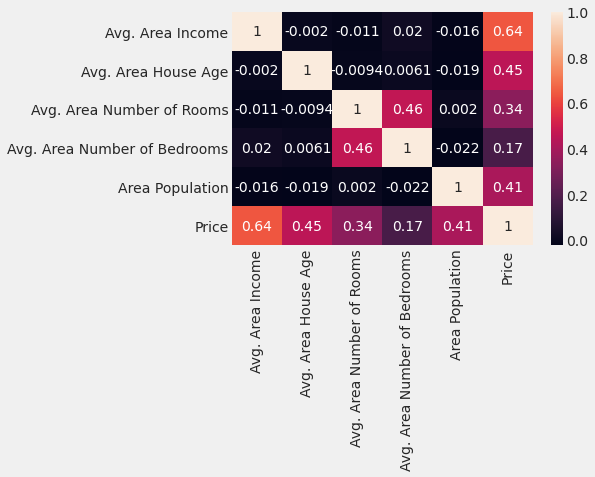

In [15]:
sns.heatmap(USAhousing.corr(), annot=True)

**TRAINING A LINEAR MODEL**

In [16]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

**LINEAR REGRESSION**

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

**MODEL EVALUATION**

In [21]:
print(lin_reg.intercept_)

1228219.1492415662


In [22]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


PREDICTION IN GIVEN MODEL

In [23]:
pred = lin_reg.predict(X_test)


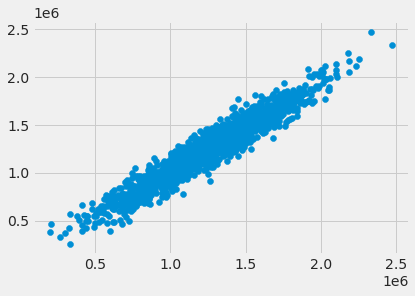

In [27]:
plt.scatter(y_test, pred)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


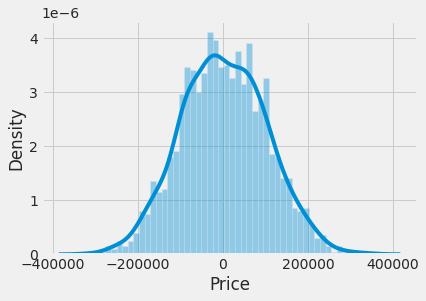

In [24]:
sns.distplot((y_test - pred), bins=50);

**REGRESSION EVALUATION METRICS**

In [25]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


In [26]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


**ROBUST REGRESSION**

In [27]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81464.48821670057
MSE: 10152855333.884829
RMSE: 100761.37818571573
R2 Square 0.913966380418828
__________________________________
Train set evaluation:
_____________________________________
MAE: 81772.82336300002
MSE: 10401411262.758661
RMSE: 101987.30932208507
R2 Square 0.9184014458375782
__________________________________


In [28]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453


**RIDGE REGRESSION**

In [29]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
__________________________________
Train set evaluation:
_____________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484
__________________________________


In [30]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


**LASSO REGRESSION**

In [31]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
__________________________________


In [32]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


In [33]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81184.43147330944
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
__________________________________
Train set evaluation:
_____________________________________
MAE: 81577.88831531754
MSE: 10299274948.10146
RMSE: 101485.34351373828
R2 Square 0.9192027001474953
__________________________________


In [34]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


**POLYNOMIAL REGRESSION**

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119698
MSE: 10081983997.620703
RMSE: 100409.0832426066
R2 Square 0.9145669324195059
__________________________________
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007814
RMSE: 101323.67517519198
R2 Square 0.9194599187853729
__________________________________


In [36]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


In [37]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56608980497
MSE: 10068423191.60201
RMSE: 100341.53273496479
R2 Square 0.914681844450443
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.50109606383
MSE: 10287043161.255117
RMSE: 101425.06180059796
R2 Square 0.9192986579070983
__________________________________


In [38]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566090,1.006842e+10,100341.532735,0.914682,0.000000


**ANN**

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
3500/3500 [==============================] - 6s 1ms/step - loss: 1649601593348.6797 - val_loss: 1658151370752.0000
Epoch 2/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1655748853675.7634 - val_loss: 1656837505024.0000
Epoch 3/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1619307400021.4795 - val_loss: 1651127746560.0000
Epoch 4/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1605869570396.0605 - val_loss: 1634646622208.0000
Epoch 5/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1610366561631.2778 - val_loss: 1596707831808.0000
Epoch 6/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1549009190453.3792 - val_loss: 1521318363136.0000
Epoch 7/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1461499722952.3542 - val_loss: 1387798462464.0000
Epoch 8/100
3500/3500 [==============================] - 5s 1ms/step - loss: 1292658921803.0962 - val_loss: 117

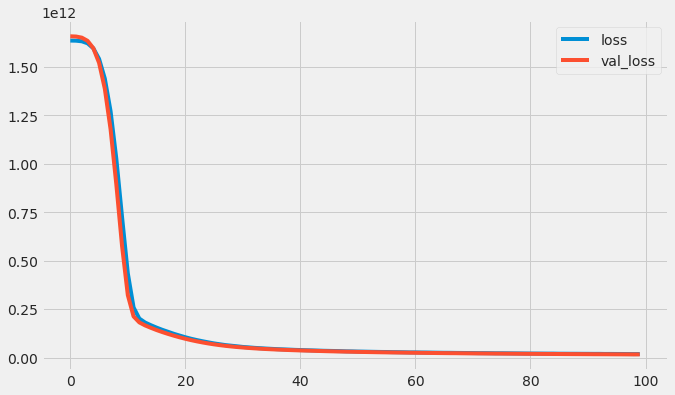

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [41]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 99632.83252214063
MSE: 16078511007.897339
RMSE: 126801.0686386252
R2 Square 0.8637533527274411
__________________________________
Train set evaluation:
_____________________________________
MAE: 100910.03861815373
MSE: 16755929838.248684
RMSE: 129444.6979920332
R2 Square 0.8685505635813644
__________________________________


In [42]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566090,1.006842e+10,100341.532735,0.914682,0.000000
7,Artficial Neural Network,99632.832522,1.607851e+10,126801.068639,0.863753,0.000000


**RANDOM FOREST REGRESSOR****

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94115.03578208562
MSE: 14100401025.954
RMSE: 118745.10948226036
R2 Square 0.8805155300735763
__________________________________
Train set evaluation:
_____________________________________
MAE: 35282.25581897114
MSE: 1988887386.232999
RMSE: 44596.94368712949
R2 Square 0.9843972773493193
__________________________________


In [44]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566090,1.006842e+10,100341.532735,0.914682,0.000000
7,Artficial Neural Network,99632.832522,1.607851e+10,126801.068639,0.863753,0.000000
8,Random Forest Regressor,94115.035782,1.410040e+10,118745.109482,0.880516,0.000000


**SVM**

In [45]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051021634
MSE: 11720932765.275513
RMSE: 108263.25676458987
R2 Square 0.9006787511983232
__________________________________
Train set evaluation:
_____________________________________
MAE: 73692.5684807321
MSE: 9363827731.411337
RMSE: 96766.87310960986
R2 Square 0.9265412370487783
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,81464.488217,1.015286e+10,100761.378186,0.913966,0.910453
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566090,1.006842e+10,100341.532735,0.914682,0.000000
7,Artficial Neural Network,99632.832522,1.607851e+10,126801.068639,0.863753,0.000000
8,Random Forest Regressor,94115.035782,1.410040e+10,118745.109482,0.880516,0.000000
9,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000


**MODEL COMPARISON**

<AxesSubplot:ylabel='Model'>

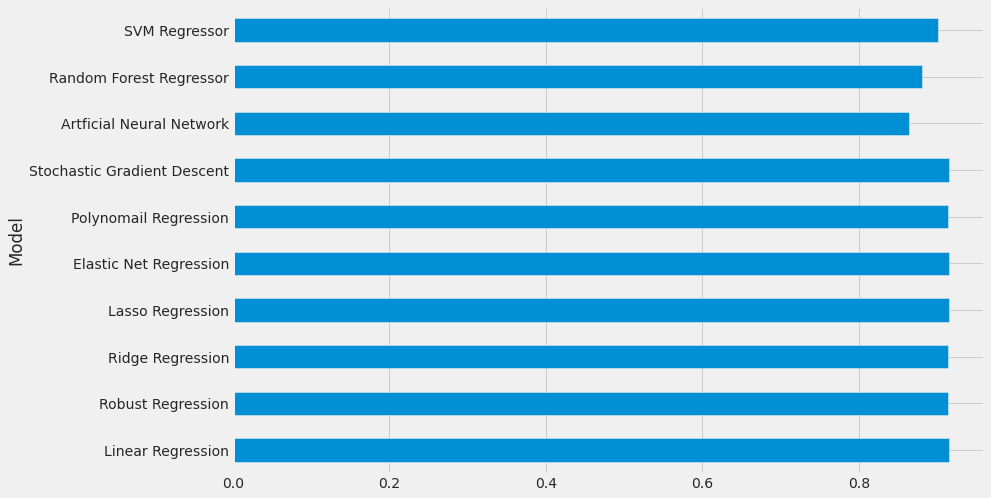

In [47]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))